### Import

In [1]:
from src.ppo.ppo import PPOAgent, Config
import gym
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Generate game environnement

In [2]:
env_name = "Taxi-v3"
env = gym.make(env_name)
#print(env.observation_space.shape[0]
#print('Observation:', env.observation_space.n, env.desc.shape[1], env.desc.shape[0])
#print('Action:', env.action_space.n)

### AI config

In [3]:
config = Config(training_step=40000, 
                lr=0.0003,
                lr_critic=0.001,
                lr_decay=False, 
                gamma=0.99,
                loss='mse', 
                n_updates=80,
                batch_size=2000, 
                epsilon=0.5, 
                clip=0.2)

### Create and train agent

In [4]:
agent = PPOAgent(env=env, config=config)
scores = agent.fit()
ep_scores = []
for i in scores:
    ep_scores.append(sum(i))

In [5]:
df = pd.Series(ep_scores)

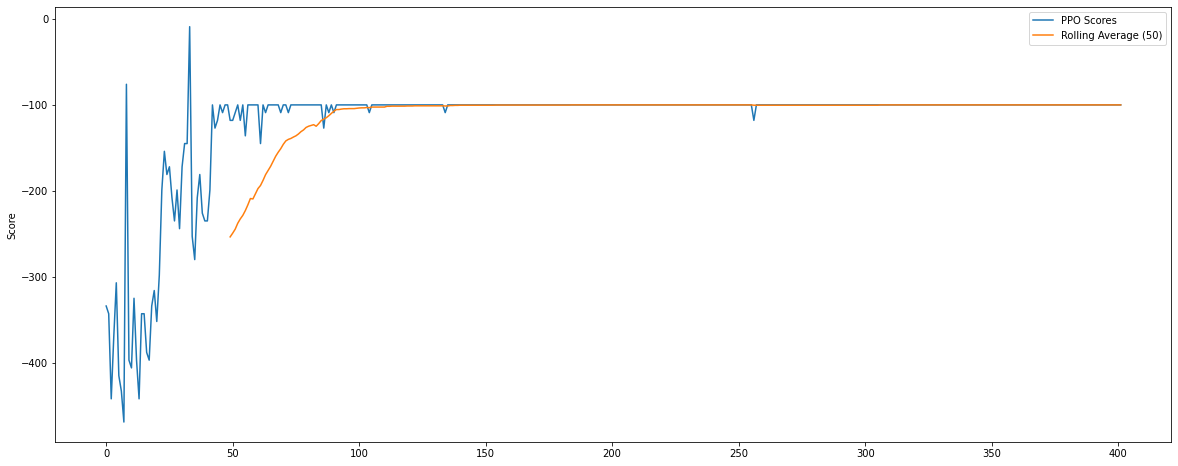

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8), sharex=True, sharey=True)
df.plot(ax=axes, label="PPO Scores")
df.rolling(window=50).mean().rename("Rolling Average (50)").plot(ax=axes)
axes.legend()
_ = axes.set_ylabel("Score")